In [36]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import math
%matplotlib inline
titanic=pd.read_csv("C:/Users/User/Downloads/train.csv")
titanic.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


 Analyzing data
 

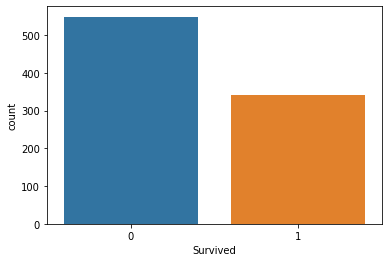

In [37]:
sns.countplot(x="Survived",data=titanic)


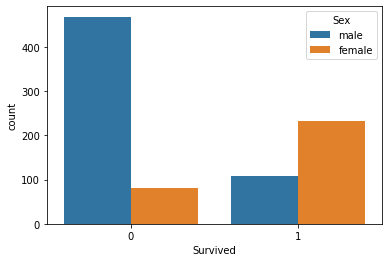

In [39]:
sns.countplot(x="Survived",hue="Sex",data=titanic)

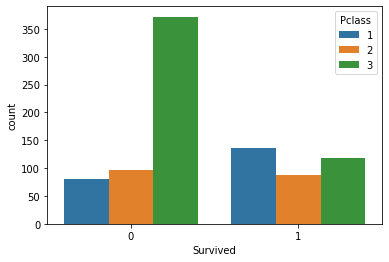

In [41]:
sns.countplot(x="Survived",hue="Pclass",data=titanic)

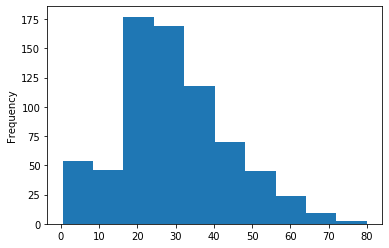

In [43]:
titanic["Age"].plot.hist()

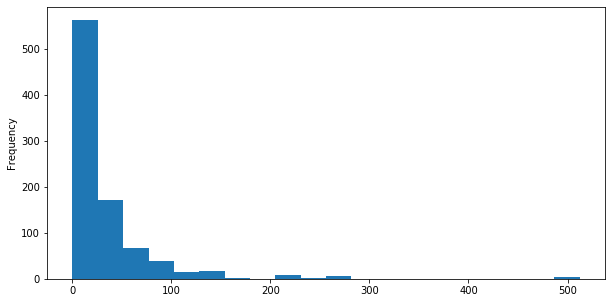

In [51]:
titanic["Fare"].plot.hist(bins=20 , figsize=(10,5))

In [52]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


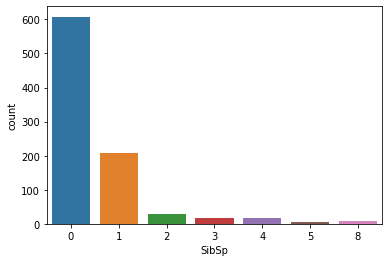

In [53]:
sns.countplot(x="SibSp",data=titanic)

#Data Wrangling

In [56]:
 titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [144]:
new_data = titanic.dropna(axis = 0, how ='any')
titanic.isnull().sum()

Survived    0
Pclass      0
SibSp       0
Parch       0
Ticket      0
Fare        0
dtype: int64

In [59]:
#sns.heatmap(titanic.isnull(),yticklabels==False)

In [64]:
#import seaborn  as sns
#sns.boxplt(x="Pclass",y="Age",data=titanic)

In [145]:
titanic.head()

,Survived,Pclass,SibSp,Parch,Ticket,Fare
0,0,3,1,0,A/5 21171,7.2500
1,1,1,1,0,PC 17599,71.2833
2,1,3,0,0,STON/O2. 3101282,7.9250
3,1,1,1,0,113803,53.1000
4,0,3,0,0,373450,8.0500


In [66]:
titanic.drop("Cabin",axis=1,inplace=True)

In [68]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [79]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [80]:
new_data = titanic.dropna(axis = 0, how ='any')

In [81]:
new_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [146]:
new_data.head(2)

,Survived,Pclass,SibSp,Parch,Ticket,Fare
0,0,3,1,0,A/5 21171,7.2500
1,1,1,1,0,PC 17599,71.2833


In [90]:
sex=pd.get_dummies(new_data['Sex'],drop_first=True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [91]:
embark=pd.get_dummies(new_data["Embarked"],drop_first=True)

In [93]:
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [95]:
new_data=pd.concat([titanic,sex,embark],axis=1)

In [105]:
new_data.head(5)

,Survived,Pclass,Name,SibSp,Parch,Fare,male,Q,S
0,0,3,"Braund, Mr. Owen Harris",1,0,7.2500,1.0,0.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,71.2833,0.0,0.0,0.0
2,1,3,"Heikkinen, Miss. Laina",0,0,7.9250,0.0,0.0,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,53.1000,0.0,0.0,1.0
4,0,3,"Allen, Mr. William Henry",0,0,8.0500,1.0,0.0,1.0


In [131]:
titanic.drop(["Sex","Embarked","PassengerId","Name"],axis=1,inplace=True)

In [139]:
new_data.drop(["Name"],axis=1,inplace=True)
new_data.head()


,Survived,Pclass,SibSp,Parch,Fare,male,Q,S
0,0,3,1,0,7.2500,1.0,0.0,1.0
1,1,1,1,0,71.2833,0.0,0.0,0.0
2,1,3,0,0,7.9250,0.0,0.0,1.0
3,1,1,1,0,53.1000,0.0,0.0,1.0
4,0,3,0,0,8.0500,1.0,0.0,1.0


In [137]:
new_data.isnull().sum()

Survived    0
Pclass      0
Name        0
SibSp       0
Parch       0
Fare        0
male        2
Q           2
S           2
dtype: int64

In [140]:

x=new_data.drop("Survived",axis=1)
y=new_data["Survived"]

In [141]:
from sklearn.model_selection import train_test_split


In [142]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [149]:
from sklearn.linear_model import LogisticRegression 
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

In [150]:
prediction=logmodel.predict(X_test)

In [ ]:
from sklearn.matrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,prediction)

In [ ]:
from sklearn.matrics import accuracy_score

In [ ]:
accuracy_score(y_test,prediction)